<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload it on the IBM Watson studio. (If IBM Watson Cloud service does not work in your system, follow the alternate Step 2 below)

Step2(alternate): Upload it in your SN labs environment using the upload button which is highlighted in red in the image below:
Remember to upload this Jobs_API file in the same folder as your current .ipynb file

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Run all the cells of the Jobs_API file. (Even if you receive an asterik sign after running the last cell, the code works fine.)

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call
import pandas as pd

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'message': 'success', 'people': [{'name': 'Jasmin Moghbeli', 'craft': 'ISS'}, {'name': 'Andreas Mogensen', 'craft': 'ISS'}, {'name': 'Satoshi Furukawa', 'craft': 'ISS'}, {'name': 'Konstantin Borisov', 'craft': 'ISS'}, {'name': 'Oleg Kononenko', 'craft': 'ISS'}, {'name': 'Nikolai Chub', 'craft': 'ISS'}, {'name': "Loral O'Hara", 'craft': 'ISS'}], 'number': 7}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

7


Print the names of the astronauts currently on ISS.


In [7]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 7 astronauts on ISS
And their names are :
Jasmin Moghbeli
Andreas Mogensen
Satoshi Furukawa
Konstantin Borisov
Oleg Kononenko
Nikolai Chub
Loral O'Hara


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [8]:
#Import required libraries
import pandas as pd
import json
import requests

#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.


In [9]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

response = requests.get(api_url)

if response.ok:        
    data = response.json()




In [10]:
# Accessing the 'Id' of the first job in the list
first_job_id = data[10].get('Job Title')
print(first_job_id)

Executive Assistant To Chairman


In [11]:
for job_title in data:
        job_title = job_title.get('Job Title')
        print(job_title)

Digital Media Planner
Online Bidding Executive
Trainee Research/ Research Executive- Hi- Tech Operations
Technical Support
Software Test Engineer -hyderabad
Opening For Adobe Analytics Specialist
Sales- Fresher-for Leading Property Consultant
Opportunity For Azure Devops Architect For Hyderabad Location
BDE- New Jersey
Technical Support/ Product Support
Executive Assistant To Chairman
SEO Executive
Workflow Coordinator
Oracle IDAM
Looking Facebook /social Media Manager For our Digital Marketing Ageny
Tooling &amp; Sampling
Account Manager
Magento Developer
Looking For Trained Freshers in MS Dynamics CRM- Hyderabad
Job Openings Kotak Life/ Max Life/ Aditya Birla Health for Sales Mgr
Business Development / Corporate Sales
Business Development Manager (BDM)
QA Executive
Back End Java Developer - Restful Services/soap
Product Engineer
Opening For Articulate tool Developer - Articulate / Captivate)chennai
Urgent Hiring for Area Sales Manager
Software Engineer - C++ Development - Ooad/oops
L

In [12]:
def get_number_of_jobs_T(technology):
    count = 0  # Inicializácia počítadla

    for job_title in data:
        job_title_lower = job_title.get('Job Title', '').lower()
        key_skills_lower = job_title.get('Key Skills', '').lower()
        
        if technology.lower() in job_title_lower or technology.lower() in key_skills_lower:  
            count += 1  # Inkrementácia počtu, ak áno
    
    return count 

Calling the function for Python and checking if it works.


In [13]:
get_number_of_jobs_T("Python")

1188

#### Write a function to find number of jobs in US for a location of your choice


In [14]:
def get_number_of_jobs_L(location):
    
    get_number_of_jobs = 0  # Initialize count variable

    for row in data:
        if location.lower() in row.get("Location").lower():
           get_number_of_jobs += 1 


    return get_number_of_jobs

Call the function for Los Angeles and check if it is working.




In [15]:
#your code goes here
L= ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle"]

In [16]:
def get_number_of_jobs(location):
    count = 0  # Initialize count variable

    for row in data:
        if location.lower() in row.get("Location").lower():
            count += 1 

    return count

for city in L:
    print(city, get_number_of_jobs(city))


Los Angeles 640
New York 3226
San Francisco 435
Washington DC 5316
Seattle 3375


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all locations for which you need to find the number of jobs postings.


In [17]:
import openpyxl

# Funkcia na získanie počtu pracovných pozícií pre danú technológiu
def get_number_of_jobs_T(technology, data):
    count = 0  # Inicializácia počítadla

    for job_title in data:
        if technology.lower() in job_title.get('Job Title').lower():  
            count += 1  # Inkrementácia počtu, ak áno
    
    return count  

# Zoznam technológií (lubovolny zoznam programovacich jazykov)
technologies = ["Python", "Java", "JavaScript", "C++", "SQL"]

# Načítanie dát z JSON alebo iného zdroja

api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

response = requests.get(api_url)

if response.ok:        
    data = response.json()

# Predpokladáme, že máte nejakú premennú `data` obsahujúcu dáta vo formáte, ktorý sme poskytli vyššie

# Vytvorenie nového súboru Excel
workbook = openpyxl.Workbook()
sheet = workbook.active
sheet.title = "Jobs Data"

# Zápis hlavičky
sheet.append(["Technology", "Number of Jobs"])

# Pre každú technológiu získať počet pracovných pozícií a zapísať do Excel
for tech in technologies:
    jobs_count = get_number_of_jobs_T(tech, data)
    sheet.append([tech, jobs_count])

# Uložiť súbor Excel
workbook.save("jobs_data.xlsx")


Import libraries required to create excel spreadsheet


In [23]:
import pandas

df = pd.read_excel("jobs_data.xlsx")

<BarContainer object of 12 artists>

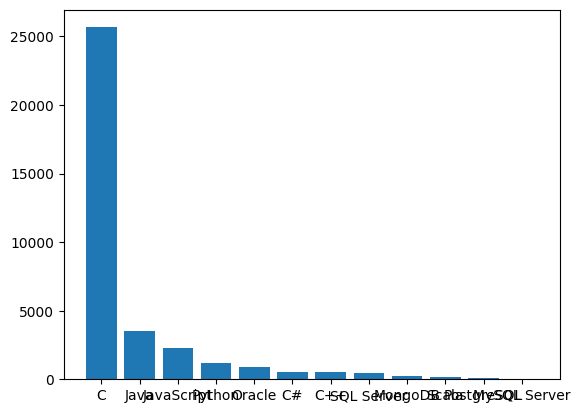

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.sort_values(by="Number of Jobs", ascending=False)

plt.bar(x=df["Technology"], data=df, height=df["Number of Jobs"])

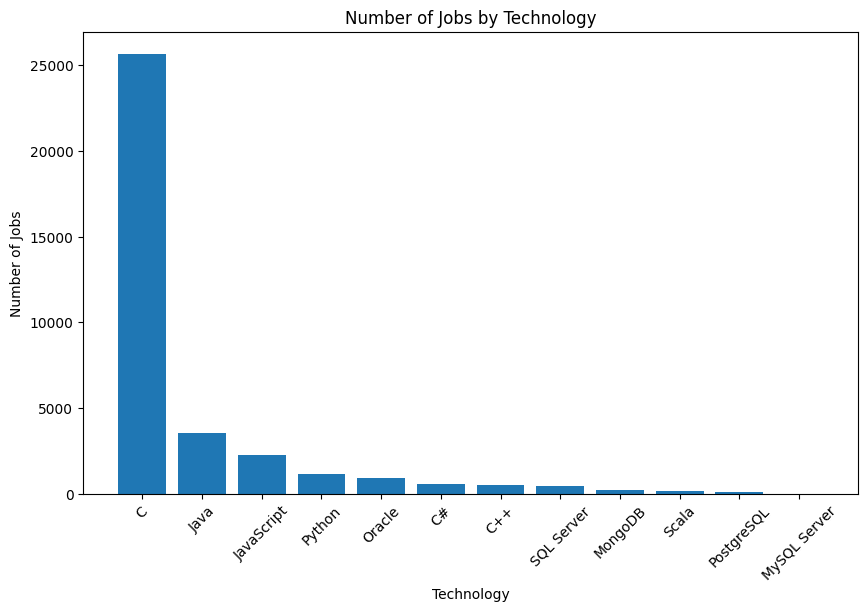

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Načtení dat z Excelu
df = pd.read_excel("jobs_data.xlsx")

# Předpokládá se, že máte DataFrame df
df = df.sort_values(by="Number of Jobs", ascending=False)

# Vytvoření sloupcového grafu
plt.figure(figsize=(10, 6))  # Volitelné: nastavení velikosti grafu
plt.bar(x=df["Technology"], height=df["Number of Jobs"])
plt.xticks(rotation=45)  # Volitelné: otočení popisků osy x pro lepší čitelnost
plt.xlabel("Technology")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs by Technology")
plt.show()


Create a workbook and select the active worksheet


In [19]:
# your code goes here

Find the number of jobs postings for each of the location in the above list.
Write the Location name and the number of jobs postings into the excel spreadsheet.


In [20]:
#your code goes here (original)


def get_number_of_jobs_T(technology, data):
    count = 0  # Inicializácia počítadla

    for job_title in data:
        job_title_lower = job_title.get('Job Title', '').lower()
        key_skills_lower = job_title.get('Key Skills', '').lower()
        
        if technology.lower() in job_title_lower or technology.lower() in key_skills_lower:  
            count += 1  # Inkrementácia počtu, ak áno
    
    return count  

# Zoznam technológií
technologies = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]

# Predpokladáme, že máte nejakú premennú `data` obsahujúcu dáta vo formáte, ktorý sme poskytli vyššie

# Vytvorenie nového súboru Excel
workbook = openpyxl.Workbook()
sheet = workbook.active
sheet.title = "Jobs Data"

# Zápis hlavičky
sheet.append(["Technology", "Number of Jobs"])

# Pre každú technológiu získať počet pracovných pozícií a zapísať do Excel
for tech in technologies:
    jobs_count = get_number_of_jobs_T(tech, data)
    sheet.append([tech, jobs_count])

# Uložiť súbor Excel
workbook.save("jdata.xlsx")


In [21]:
# Modification for "C"

def get_number_of_jobs_T(technology, data):
    count = 0  # Inicializácia počítadla

    for job_title in data:
        job_title_lower = job_title.get('Job Title', '').lower()
        key_skills_lower = job_title.get('Key Skills', '').lower()
        
      # Kontrola, či reťazec obsahuje iba konkrétny jazyk a nie jeho podmnožinu
        if technology.lower() == "c":
            if technology.lower() in job_title_lower and "c++" not in job_title_lower:
                count += 1
            elif technology.lower() in key_skills_lower and "c++" not in key_skills_lower:
                count += 1
        else:
            if technology.lower() in job_title_lower or technology.lower() in key_skills_lower:
                count += 1
    
    return count  

# Zoznam technológií
technologies = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]

# Predpokladáme, že máte nejakú premennú `data` obsahujúcu dáta vo formáte, ktorý sme poskytli vyššie

# Vytvorenie nového súboru Excel
workbook = openpyxl.Workbook()
sheet = workbook.active
sheet.title = "Jobs Data"

# Zápis hlavičky
sheet.append(["Technology", "Number of Jobs"])

# Pre každú technológiu získať počet pracovných pozícií a zapísať do Excel
for tech in technologies:
    jobs_count = get_number_of_jobs_T(tech, data)
    sheet.append([tech, jobs_count])

# Uložiť súbor Excel
workbook.save("jobs_data.xlsx")


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [62]:
# your code goes here
df = pd.read_csv("scraped_data.csv", skiprows=1)

In [64]:
df.dtypes

Language                 object
Average Annual Salary    object
dtype: object

In [66]:
df["Average Annual Salary"] = df["Average Annual Salary"].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jakub\AppData\Local\Temp\ipykernel_8752\2302069952.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["Average Annual Salary"] = df["Average Annual Salary"].replace('[\$,]', '', regex=True).astype(float)


In [67]:
df

,Language,Average Annual Salary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0
5,C++,113865.0
6,C#,88726.0
7,PHP,84727.0
8,SQL,84793.0
9,Go,94082.0


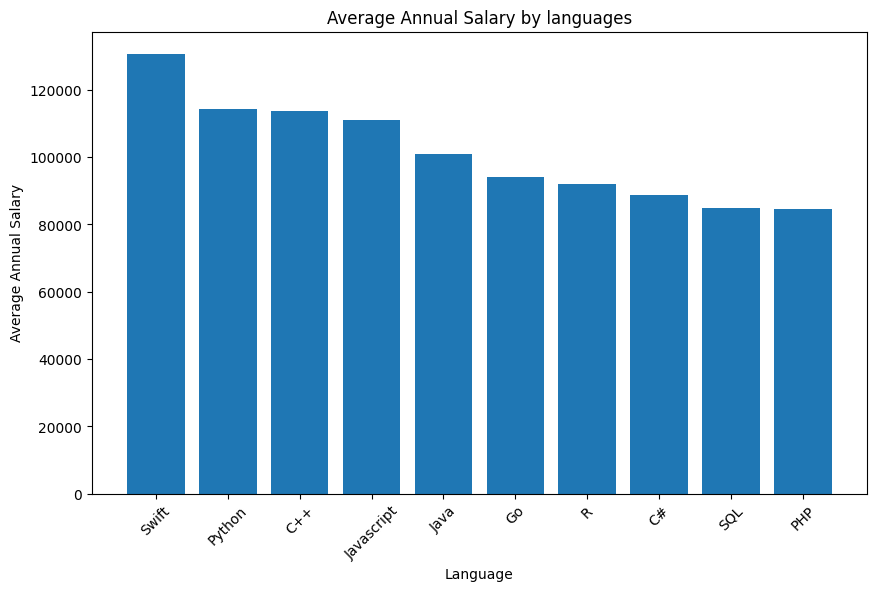

In [68]:
# Předpokládá se, že máte DataFrame df
df = df.sort_values(by="Average Annual Salary", ascending=False)

# Vytvoření sloupcového grafu
plt.figure(figsize=(10, 6))  # Volitelné: nastavení velikosti grafu
plt.bar(x=df["Language"], height=df["Average Annual Salary"])
plt.xticks(rotation=45)  # Volitelné: otočení popisků osy x pro lepší čitelnost
plt.xlabel("Language")
plt.ylabel("Average Annual Salary")
plt.title("Average Annual Salary by languages")
plt.show()

In [47]:
df

,Language,Average Annual Salary
9,Go,"$94,082"
2,R,"$92,037"
6,C#,"$88,726"
8,SQL,"$84,793"
7,PHP,"$84,727"
4,Swift,"$130,801"
0,Python,"$114,383"
5,C++,"$113,865"
3,Javascript,"$110,981"
1,Java,"$101,013"


## Author


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2022 IBM Corporation. All rights reserved. 
